In [1]:
import pickle
import utils
import numpy as np
import matplotlib.pyplot as plt

CURRENT_MODEL = None
N_dim = 100


x1_min = -10
x1_max = 10

x2_min = 20
x2_max = 40

test_min = -1
test_max= 1

limits = [x1_min, x1_max, x2_min, x2_max]
test_limits = [test_min, test_max]

num_samples = 50

In [9]:
from utils import MLP
from utils import CMA_info
import seaborn as sns

In [3]:
with open('../epoch_experiment_10_repeats.p','rb') as F:
    all_info = pickle.load(F)

In [4]:
dist_means = []
dist_stds = []
attack_rate_means = []
attack_rate_stds = []

for n_epoch in [25,100,400,1600]:
    all_distances = []
    all_attack_rates = []

    for i in range(10):
        all_distances.extend(all_info[i][1][n_epoch].distances)        
        num_attacks = len(all_info[i][1][n_epoch].in_dist_advs)
        num_total = len(all_info[i][1][n_epoch].starts)
        all_attack_rates.extend([num_attacks/num_total])
        
    attack_rate_means.append(np.mean(all_attack_rates))
    attack_rate_stds.append(np.std(all_attack_rates))
    dist_mean = np.mean(all_distances)
    dist_std = np.std(all_distances)
    dist_means.append(dist_mean)
    dist_stds.append(dist_std)

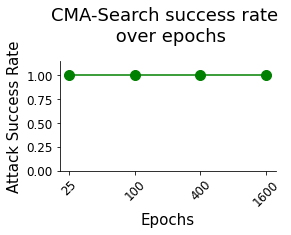

In [14]:
plt.figure(figsize=(4,3.5))
plt.errorbar(range(4), attack_rate_means, attack_rate_stds, marker='o',color='green', markersize=10)
plt.ylim(0,1.15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Attack Success Rate', fontsize=15)
plt.xticks(range(4),[25,100,400,1600], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.title('CMA-Search success rate \n over epochs',fontsize=18, y=1.12)
plt.tight_layout()
plt.savefig('paper_figures/uniform_100_epochs_rate.pdf')
plt.show()

In [11]:
# plt.errorbar(range(4), attack_rate_means, attack_rate_stds, marker = 'o', capsize=5)
# # plt.xticks(range(4),[25,100,400,1600])
# # plt.title('Attack rate for adv sample as a function of dataset dims')
# plt.xlabel('Dataset Dimensions')
# plt.ylabel('Distance')
# plt.show()

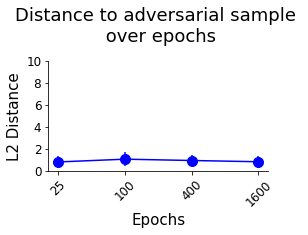

In [15]:
plt.figure(figsize=(4,3.5))
plt.errorbar(range(4), dist_means, dist_stds, marker='o',color='blue', markersize=10)
# plt.plot(range(0,4), material_results, marker='o',color='blue', markersize=10, label='Materials')
# plt.plot(range(0,4), viewpoint_results, marker='o',color='red', markersize=10, label='Viewpoints')
plt.ylim(0,10)
# plt.title('Generalization to OOD domains',fontsize=18, y=1.12);
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('L2 Distance', fontsize=15)
# plt.legend(loc="lower right", fontsize=12)
plt.xticks(ticks = range(4), labels = [25,100,400,1600], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.title('Distance to adversarial sample \n over epochs',fontsize=18, y=1.12)
plt.tight_layout()
plt.savefig('paper_figures/uniform_100_epochs_distances.pdf')
plt.show()

In [13]:
# plt.errorbar(range(4), dist_means, dist_stds, marker = 'o', capsize=5)
# plt.xticks(range(4),[25,100,400,1600])
# plt.title('Distance to adv sample as a function of epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Distance')
# plt.ylim(0,5)
# plt.show()